### **Introducción A Python: PANDAS** ⏰

#### **1. Creación e Importación de datos** ⏰

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

datos_dict= {
    'Nombre': ['Juan', 'María', 'Pedro', 'Ana', 'Luis'],
    'Edad': [25, 30, 35, 40, 45],
    'Ciudad': ['Madrid', 'Barcelona', 'Valencia', 'Sevilla', 'Zaragoza'],
    'Puntuacion': [85, 90, 95, 100, 75]
}

df = pd.DataFrame(datos_dict)
df

##Creando un dataframe con Numpy
arreglo = np.random.randn(100, 4)
df_numpy = pd.DataFrame(arreglo, columns=['A', 'B', 'C','D'])
df_numpy

##Creando un dataframe desde TXT
import io
data = io.StringIO("""Nombre,Edad,Ciudad,Puntuacion
Juan,25,Madrid,85
María,30,Barcelona,90
Pedro,35,Valencia,95
Ana,43, Madrid,89""")

df3 = pd.read_csv(data)
df3

##Creación de datos con base en excel Nube - datos desde API - datos locales
##datos desde API
casoscovid = pd.read_csv('https://query.data.world/s/2xiiymoyecdsh7lpgxcdmg5vt4mswd?dws=00000', sep="\t")
print(casoscovid)

##datos que estan en excel Nube.
weather = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vT-nHIpeVVLZawMdDWsjKCV4lHeZvbvtR4KsyiLjbb0nzav6YXc7ZjmgI_SdyHMWeVC5Xyts87yaPnq/pub?output=csv')
print(weather.tail())

##Datos que estan de manera local .xls .xlsx
datos = pd.read_csv('/content/drive/MyDrive/DATOS/archivo.txt')
datos.head()

             City_CH                  City_EN  FID  Field_1  GbCity  GbProv  \
0             ������                  Beijing    0       24    1100      11   
1              �����                  Tianjin    1      245    1200      12   
2             ʯ��ׯ��             Shijiazhuang    2      228    1301      13   
3              ��ɽ��                 Tangshan    3      244    1302      13   
4             �ػʵ���              Qinhuangdao    4      201    1303      13   
..               ...                      ...  ...      ...     ...     ...   
334          �������               Hetiandiqu  334       90    6532      65   
335  ���������������               Yilihasake  335      299    6540      65   
336          ���ǵ���                Tachengdi  336      239    6542      65   
337        ����̩����                 Aletaidi  337        4    6543      65   
338        ֱϽ������λ  Xinjiang (Direct Units)  338      328    6590      65   

    Prov_CH   Prov_EN  N_D_0115  N_D_0116  ...  T_D

,Hola Mundo


#### **2. Manipulación** ⏰

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Nombre      5 non-null      object
 1   Edad        5 non-null      int64 
 2   Ciudad      5 non-null      object
 3   Puntuacion  5 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 292.0+ bytes


In [5]:
df.shape

(5, 4)

In [6]:
df.describe()

,Edad,Puntuacion
count,5.000000,5.000000
mean,35.000000,89.000000
std,7.905694,9.617692
min,25.000000,75.000000
25%,30.000000,85.000000
50%,35.000000,90.000000
75%,40.000000,95.000000
max,45.000000,100.000000


In [7]:
##Selección de columnas
df['Nombre']

,Nombre
0,Juan
1,María
2,Pedro
3,Ana
4,Luis


In [ ]:
##Selección de multiples columnas
df[['Edad', 'Nombre']]

,Edad,Nombre
0,25,Juan
1,30,María
2,35,Pedro
3,40,Ana
4,45,Luis


In [ ]:
##Selección de filas iloc
print(df)
print()
print(df.iloc[0])

  Nombre  Edad     Ciudad  Puntuacion
0   Juan    25     Madrid          85
1  María    30  Barcelona          90
2  Pedro    35   Valencia          95
3    Ana    40    Sevilla         100
4   Luis    45   Zaragoza          75

Nombre          Juan
Edad              25
Ciudad        Madrid
Puntuacion        85
Name: 0, dtype: object


In [ ]:
print(df)
print()
df4 = df.iloc[1:4, [0,3]]
df4

  Nombre  Edad     Ciudad  Puntuacion
0   Juan    25     Madrid          85
1  María    30  Barcelona          90
2  Pedro    35   Valencia          95
3    Ana    40    Sevilla         100
4   Luis    45   Zaragoza          75



,Nombre,Puntuacion
1,María,90
2,Pedro,95
3,Ana,100


In [ ]:
##Filtros
df[df['Edad'] > 30]

#filtro con &
df[(df['Edad'] > 30) & (df['Puntuacion'] > 90)]

##Query- Spark- Parquet
df.query('Edad > 30 and Puntuacion > 90')

,Nombre,Edad,Ciudad,Puntuacion
2,Pedro,35,Valencia,95
3,Ana,40,Sevilla,100


#### **3. Manejo de Valores Faltantes NAN** ⏰

In [9]:
# Crear un diccionario con datos
datos = {
    'Nombre': ['Juan', 'María', 'Pedro', 'Ana', 'Luis'],
    'Edad': [25, 30, np.nan, 40, 45],
    'Ciudad': ['Madrid', 'Barcelona', np.nan, 'Madrid', 'Zaragoza'],
    'Puntuacion': [85, 90, 95, np.nan, 75]
}

# Crear el DataFrame
df = pd.DataFrame(datos)

# Mostrar el DataFrame
print(df)

##Detectas valores NAN
df.isnull()
df.isna()

##Totalizar los datos NAN (General o por columna)
df.isna().sum()

df.isna().sum().sum()

##Forma de no tratar los datos NAN
df_dropna= df.dropna()
df_dropna

##Tratar los datos NA
df_fillna = df.fillna(0)
df_fillna

import warnings
warnings.filterwarnings('ignore')
##Recordemos si los datos son normales - mean, si no son normales- median
df['Edad'].fillna(df['Edad'].median(), inplace=True)

df['Puntuacion'].fillna(df['Puntuacion'].median(), inplace=True)
df

df['Ciudad'].fillna(df['Ciudad'].mode()[0], inplace=True)
df

  Nombre  Edad     Ciudad  Puntuacion
0   Juan  25.0     Madrid        85.0
1  María  30.0  Barcelona        90.0
2  Pedro   NaN        NaN        95.0
3    Ana  40.0     Madrid         NaN
4   Luis  45.0   Zaragoza        75.0


,Nombre,Edad,Ciudad,Puntuacion
0,Juan,25.0,Madrid,85.0
1,María,30.0,Barcelona,90.0
2,Pedro,35.0,Madrid,95.0
3,Ana,40.0,Madrid,87.5
4,Luis,45.0,Zaragoza,75.0


In [11]:
df[['Ciudad','Puntuacion']].value_counts()

Ciudad     Puntuacion
Barcelona  90.0          1
Madrid     85.0          1
           87.5          1
           95.0          1
Zaragoza   75.0          1
Name: count, dtype: int64

In [12]:
df.groupby('Ciudad')['Puntuacion'].median()

,Puntuacion
Ciudad,
Barcelona,90.0
Madrid,87.5
Zaragoza,75.0


#### **4. Operaciones de Agrupación** ⏰

In [23]:
print("\n## Operaciones estadísticas básicas")
print("Media de edad:", df['Edad'].mean())
print("Mediana de puntuación:", df['Puntuacion'].median())
print("Desviación estándar de edad:", df['Edad'].std())
print("Valor mínimo de puntuación:", df['Puntuacion'].min())
print("Valor máximo de edad:", df['Edad'].max())

print("\n## Agrupación de datos")
print("Agrupación por Ciudad y promedio de puntuación:")
print(df.groupby('Ciudad')['Puntuacion'].mean())

print("\n## Ordenación de datos")
print("DataFrame ordenado por Puntuación (descendente):")
print(df.sort_values('Edad', ascending=False))

print("\n## Aplicación de funciones")
print("Aplicando una función personalizada a la columna Edad:")
print(df['Edad'].apply(lambda i: "Joven" if i < 35 else "Adulto"))
df['Validacion'] = df['Edad'].apply(lambda i: "Joven" if i < 35 else "Adulto")

df['Validación'] = df['Edad'].apply(lambda i: "Joven" if i < 35 else "Adulto")
df

df.drop('Validación', axis=1, inplace=True)
df


print("\n## Creación de nuevas columnas")
df['Categoria'] = df['Edad'].apply(lambda x: "Joven" if x < 35 else "Adulto")
df['Puntuacion_Normalizada'] = (df['Puntuacion'] - df['Puntuacion'].min()) / (df['Puntuacion'].max() - df['Puntuacion'].min())
df['Edad_Normalizada'] = (df['Edad'] - df['Edad'].min()) / (df['Edad'].max() - df['Edad'].min())
print("DataFrame con nuevas columnas:")
print(df)





## Operaciones estadísticas básicas
Media de edad: 35.0
Mediana de puntuación: 87.5
Desviación estándar de edad: 7.905694150420948
Valor mínimo de puntuación: 75.0
Valor máximo de edad: 45.0

## Agrupación de datos
Agrupación por Ciudad y promedio de puntuación:
Ciudad
Barcelona    90.000000
Madrid       89.166667
Zaragoza     75.000000
Name: Puntuacion, dtype: float64

## Ordenación de datos
DataFrame ordenado por Puntuación (descendente):
  Nombre  Edad     Ciudad  Puntuacion Validacion Categoria  \
4   Luis  45.0   Zaragoza        75.0     Adulto    Adulto   
3    Ana  40.0     Madrid        87.5     Adulto    Adulto   
2  Pedro  35.0     Madrid        95.0     Adulto    Adulto   
1  María  30.0  Barcelona        90.0      Joven     Joven   
0   Juan  25.0     Madrid        85.0      Joven     Joven   

   Puntuacion_Normalizada  
4                   0.000  
3                   0.625  
2                   1.000  
1                   0.750  
0                   0.500  

## Aplicació

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Edad,5.0,35.000,7.905694,25.0,30.00,35.000,40.00,45.0
Puntuacion,5.0,86.500,7.416198,75.0,85.00,87.500,90.00,95.0
Puntuacion_Normalizada,5.0,0.575,0.370810,0.0,0.50,0.625,0.75,1.0
Edad_Normalizada,5.0,0.500,0.395285,0.0,0.25,0.500,0.75,1.0


#### **5. Aplicar funciones al Dataframes** ⏰

In [32]:
# Creamos un segundo DataFrame para combinar
datos_dict2 = {
    'Nombre': ['Juan', 'María', 'Carlos', 'Laura', 'Miguel'],
    'Salario': [2500, 3000, 2800, 3200, 2700],
    'Departamento': ['Ventas', 'Marketing', 'IT', 'RRHH', 'Finanzas']
}

df2 = pd.DataFrame(datos_dict2)
print("\nSegundo DataFrame:")
print(df2)

print("\n## Merge (combinación tipo SQL)")
print("Inner join por Nombre:")
pd.merge(df, df2, on='Nombre', how='inner')

print("\nLeft join por Nombre:")
print(pd.merge(df, df2, on='Nombre', how='left'))

print("\nRight join por Nombre:")
print(pd.merge(df, df2, on='Nombre', how='right'))

print("\nOuter join por Nombre:")
print(pd.merge(df, df2, on='Nombre', how='outer'))

print("\n## Concatenación")
print("Concatenación vertical (axis=0):")
print(pd.concat([df, df], axis=0).reset_index(drop=True))

print("\nConcatenación horizontal (axis=1):")
df_temp1 = df[['Nombre', 'Edad']]
df_temp2 = df[['Ciudad', 'Puntuacion']]
print(pd.concat([df_temp1, df_temp2], axis=1))


Segundo DataFrame:
   Nombre  Salario Departamento
0    Juan     2500       Ventas
1   María     3000    Marketing
2  Carlos     2800           IT
3   Laura     3200         RRHH
4  Miguel     2700     Finanzas

## Merge (combinación tipo SQL)
Inner join por Nombre:

Left join por Nombre:
  Nombre  Edad     Ciudad  Puntuacion Validacion Categoria  \
0   Juan  25.0     Madrid        85.0      Joven     Joven   
1  María  30.0  Barcelona        90.0      Joven     Joven   
2  Pedro  35.0     Madrid        95.0     Adulto    Adulto   
3    Ana  40.0     Madrid        87.5     Adulto    Adulto   
4   Luis  45.0   Zaragoza        75.0     Adulto    Adulto   

   Puntuacion_Normalizada  Edad_Normalizada  Salario Departamento  
0                   0.500              0.00   2500.0       Ventas  
1                   0.750              0.25   3000.0    Marketing  
2                   1.000              0.50      NaN          NaN  
3                   0.625              0.75      NaN          Na

#### **6. Gráficas con PANDAS** ⏰

Text(0, 0.5, 'Ventas')

<Figure size 3000x1800 with 0 Axes>

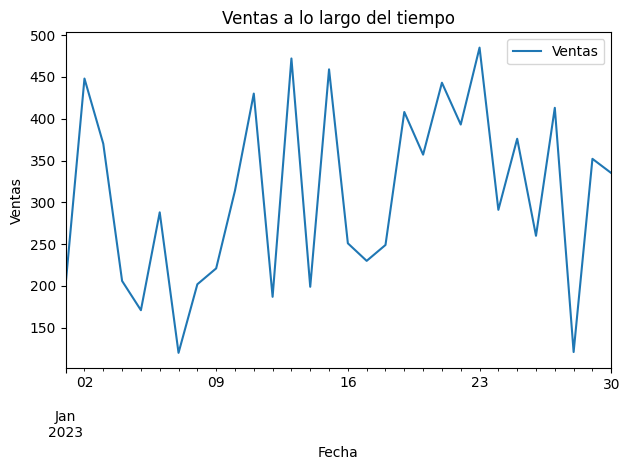

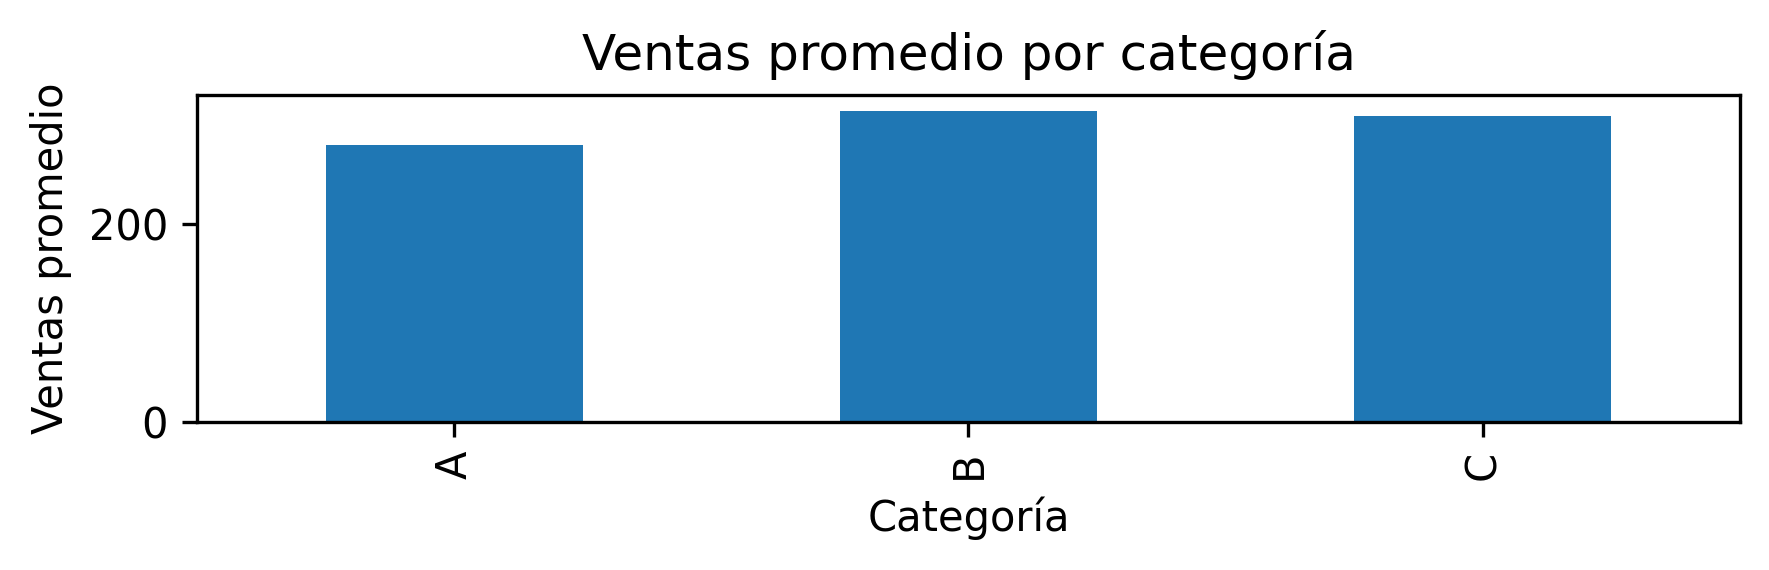

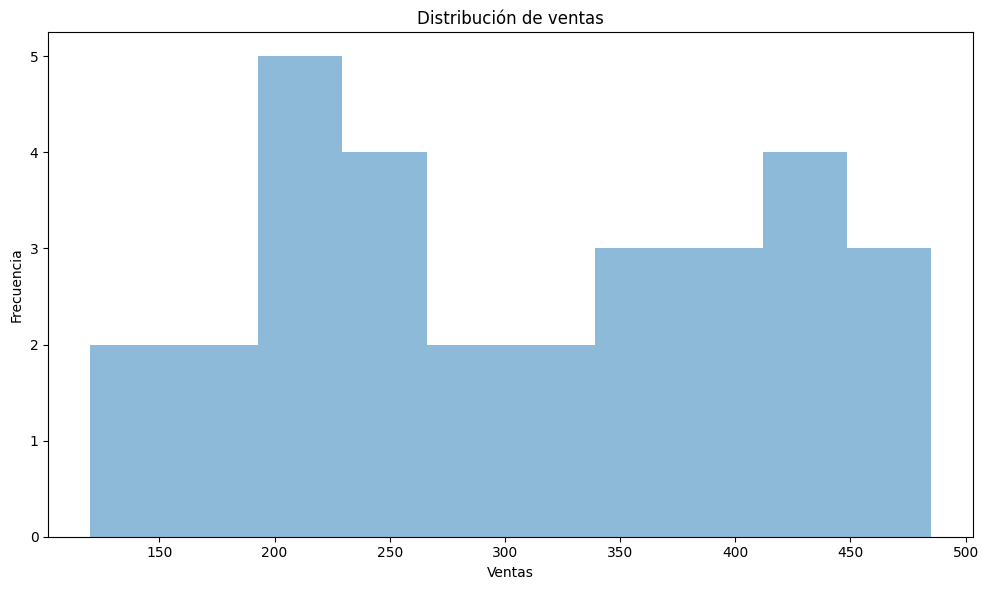

<Figure size 1000x600 with 0 Axes>

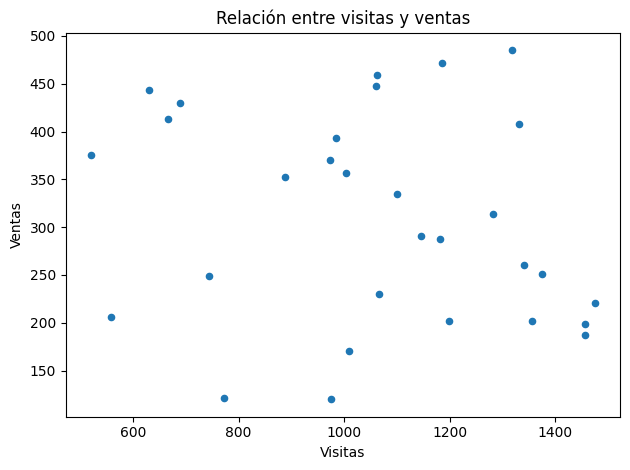

<Figure size 1000x600 with 0 Axes>

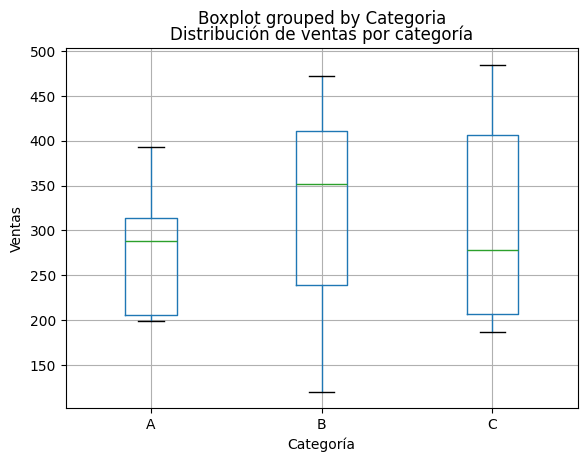

In [43]:
# Creamos un DataFrame más adecuado para visualización
np.random.seed(42)

fechas = pd.date_range(start='2023-01-01', periods=30, freq='D')
datos_viz = pd.DataFrame({
    'Fecha': fechas,
    'Ventas': np.random.randint(100, 500, size=30),
    'Visitas': np.random.randint(500, 1500, size=30),
    'Categoria': np.random.choice(['A', 'B', 'C'], size=30)
})

# Código para generar gráficos (aunque no se mostrarán en la salida de texto)
# Gráfico de líneas
plt.figure(figsize=(10, 6), dpi=300)
datos_viz.plot(x='Fecha', y='Ventas', kind='line')
plt.title('Ventas a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.savefig('grafico_lineal.svg', dpi=300)
plt.tight_layout()

# Gráfico de barras
plt.figure(figsize=(6, 2), dpi=300)
datos_viz.groupby('Categoria')['Ventas'].mean().plot(kind='bar')
plt.title('Ventas promedio por categoría')
plt.xlabel('Categoría')
plt.ylabel('Ventas promedio')
plt.tight_layout()

# Histograma
plt.figure(figsize=(10, 6))
datos_viz['Ventas'].plot(kind='hist', alpha=0.5)
plt.title('Distribución de ventas')
plt.xlabel('Ventas')
plt.ylabel('Frecuencia')
plt.tight_layout()

# Gráfico de dispersión
plt.figure(figsize=(10, 6))
datos_viz.plot(x='Visitas', y='Ventas', kind='scatter')
plt.title('Relación entre visitas y ventas')
plt.xlabel('Visitas')
plt.ylabel('Ventas')
plt.tight_layout()

# Gráfico de caja
plt.figure(figsize=(10, 6))
datos_viz.boxplot(column='Ventas', by='Categoria')
plt.title('Distribución de ventas por categoría')
plt.xlabel('Categoría')
plt.ylabel('Ventas')



#### **7. Exportar Datos** ⏰

In [44]:

# Exportar a CSV (simulado)
print("## Exportación a CSV")
df.to_csv('datos_exportados.csv', index=False)

# Exportar a Excel (simulado)
print("\n## Exportación a Excel")
df.to_excel('datos_exportados.xlsx', sheet_name='Datos', index=False)

# Exportar a JSON (simulado)
print("\n## Exportación a JSON")
df.to_json('datos_exportados.json', orient='records')

# Exportar a HTML (simulado)
print("\n## Exportación a HTML")
df.to_html('datos_exportados.html')

# Mostrar ejemplos de cómo se verían los datos exportados
print("\n## Ejemplo de datos en formato CSV:")
print(df.to_csv(index=False))

print("\n## Ejemplo de datos en formato JSON:")
print(df.to_json(orient='records'))

## Exportación a CSV

## Exportación a Excel

## Exportación a JSON

## Exportación a HTML

## Ejemplo de datos en formato CSV:
Nombre,Edad,Ciudad,Puntuacion,Validacion,Categoria,Puntuacion_Normalizada,Edad_Normalizada
Juan,25.0,Madrid,85.0,Joven,Joven,0.5,0.0
María,30.0,Barcelona,90.0,Joven,Joven,0.75,0.25
Pedro,35.0,Madrid,95.0,Adulto,Adulto,1.0,0.5
Ana,40.0,Madrid,87.5,Adulto,Adulto,0.625,0.75
Luis,45.0,Zaragoza,75.0,Adulto,Adulto,0.0,1.0


## Ejemplo de datos en formato JSON:
[{"Nombre":"Juan","Edad":25.0,"Ciudad":"Madrid","Puntuacion":85.0,"Validacion":"Joven","Categoria":"Joven","Puntuacion_Normalizada":0.5,"Edad_Normalizada":0.0},{"Nombre":"Mar\u00eda","Edad":30.0,"Ciudad":"Barcelona","Puntuacion":90.0,"Validacion":"Joven","Categoria":"Joven","Puntuacion_Normalizada":0.75,"Edad_Normalizada":0.25},{"Nombre":"Pedro","Edad":35.0,"Ciudad":"Madrid","Puntuacion":95.0,"Validacion":"Adulto","Categoria":"Adulto","Puntuacion_Normalizada":1.0,"Edad_Normalizada":0.5},{"Nombre":"Ana","Edad":